1. Set Up Environment
Install Python and tools like Jupyter Notebook or use an online platform like Google Colab or Kaggle notebooks (no setup required).

2. Import Libraries
Begin with importing essential Python libraries for data handling and visualization:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

3. Load Dataset
Load the CSV data into a pandas DataFrame (replace 'titanic.csv' with your file):

In [2]:
df = pd.read_csv('titanic.csv')
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 31: invalid continuation byte

4. Explore Data
Check the first few rows and basic info of the dataset:

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


5. Handle Missing Data
Check for missing values and decide on a strategy (fill in or drop rows):

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

/tmp/ipykernel_12795/2940318962.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace = True)


6. Simple Analysis and Visualization
Example: Plot survival count by gender

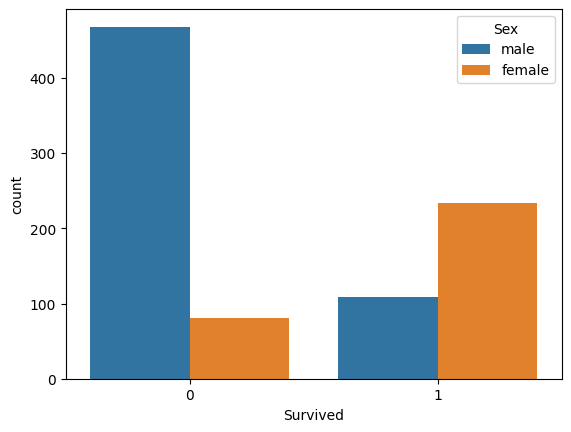

In [ ]:
sns.countplot(x = df.Survived, hue= df.Sex)
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

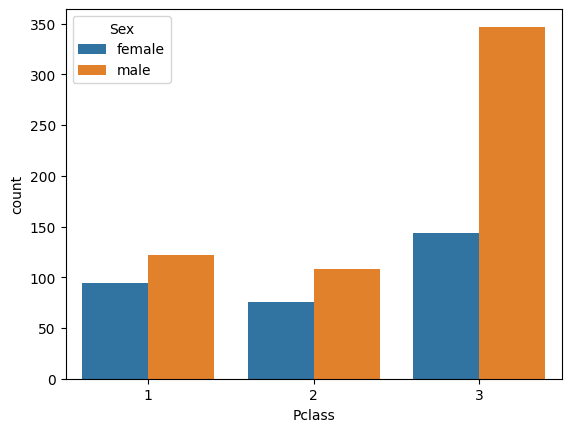

In [ ]:
sns.countplot(x = df.Pclass, hue= df.Sex)

<Axes: xlabel='Sex', ylabel='count'>

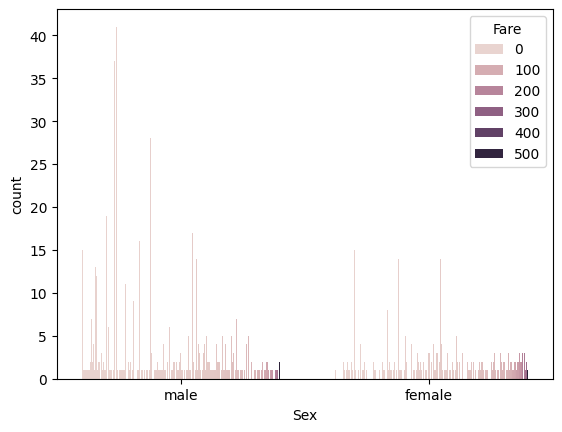

In [ ]:
sns.countplot(x= df.Sex, hue= df.Fare)

7. Age Distribution of Survivors vs Non-Survivors

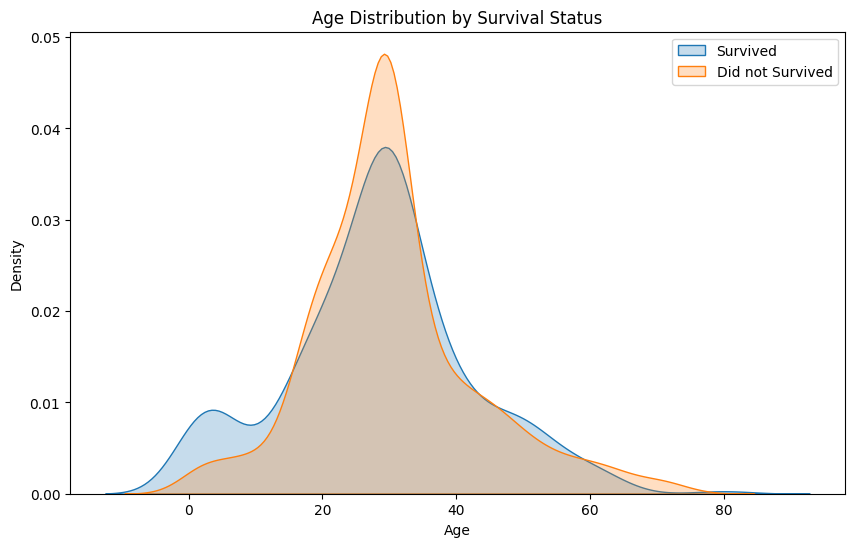

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df.loc[df['Survived'] == 1, 'Age'], label = "Survived", fill=True)
sns.kdeplot(df.loc[df['Survived'] == 0, 'Age'], label = "Did not Survived", fill=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

8. Fare Distribution by Survival Status

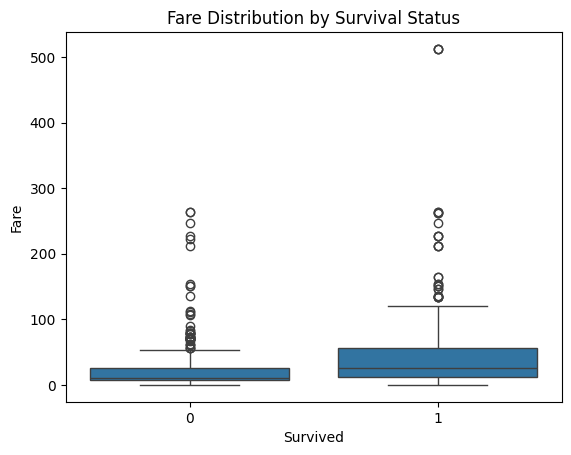

In [ ]:
plt.Figure(figsize=(10,6))
sns.boxplot(x= df.Survived,  y= df.Fare)
plt.title('Fare Distribution by Survival Status')
plt.show()

9. Embarked Port vs Survival

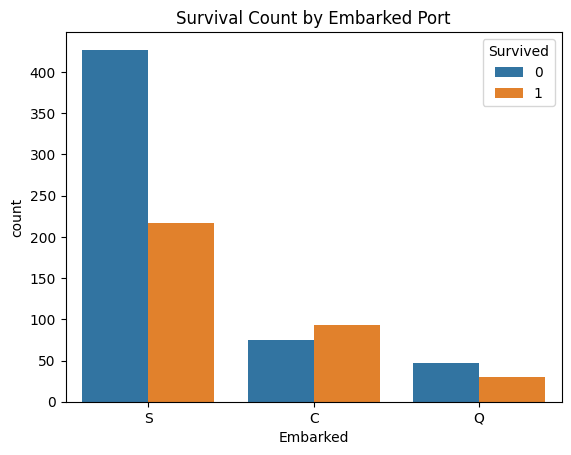

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.show()

survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked)